In [1]:
from functions import *
from architectures2 import *
from losses import *
from dataset import *
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(7)

from  sklearn.model_selection import train_test_split


In [12]:
# Generate dataset
ds = Snake(canvas_size=28, square_size=2, speed_channel=True, future=True, square=False, complexity=False)

# Show one example
c, x, y, s = ds[501]
print('x shape =', x.shape)
print('x shape =', y.shape)

Low complexity: Snake moves only forward at fixed speed.
Dataset generated... 729 available instances
x shape = torch.Size([3, 28, 28])
x shape = torch.Size([1, 784])


In [13]:
# Wrap transforming function to dataset object
t_ds = TransformedDataset(ds, xy_transform=xy_transform)

quadrant_test = True
if quadrant_test:
	train_quadrant_index, test_quadrant_index = get_quadrant_indexes(ds)
	# Get training/test subsets
	train_ds = Subset(t_ds, indices=train_quadrant_index)
	test_ds = Subset(t_ds, indices=test_quadrant_index)
else:
	# Random selection
	X_train, X_test, y_train, y_test = train_test_split(range(0, ds.len-1), range(0, ds.len-1), random_state=42)
	print('train set size = ', len(X_train))
	print('test set size = ', len(X_test))

	# Get training/test subsets
	train_ds = Subset(t_ds, indices=X_train)
	test_ds = Subset(t_ds, indices=X_test)


In [14]:
# Configure dataloaders
batch_size = 24
num_workers = 4

trainloader = DataLoader(train_ds, shuffle=True, 
                          batch_size=batch_size, 
                          num_workers=num_workers, 
                          pin_memory=True)

testloader = DataLoader(test_ds, shuffle=True, 
                         batch_size=batch_size, 
                         num_workers=1, 
                         pin_memory=True)

print('train and test dataloaders are ready...')

train and test dataloaders are ready...


In [15]:
# Init STCoordConv
net = STCoordConv(canvas_size=28, nbr_channels=3).to(device)

# Set optimizers
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.03)
criterion = cross_entropy_one_hot#soft_cross_entropy #soft_cross_entropy
epochs = 35

# Train model

In [16]:
# Train model
train_model(epochs, net, criterion, optimizer, trainloader)

Train Epoch: 1 [585/585 (100%)] Loss: 6.653097
Train Epoch: 2 [585/585 (100%)] Loss: 6.602377
Train Epoch: 3 [585/585 (100%)] Loss: 6.544275
Train Epoch: 4 [585/585 (100%)] Loss: 6.061087
Train Epoch: 5 [585/585 (100%)] Loss: 6.246194
Train Epoch: 6 [585/585 (100%)] Loss: 6.069295
Train Epoch: 7 [585/585 (100%)] Loss: 5.821727
Train Epoch: 8 [585/585 (100%)] Loss: 5.528589
Train Epoch: 9 [585/585 (100%)] Loss: 4.033621
Train Epoch: 10 [585/585 (100%)] Loss: 4.911597
Train Epoch: 11 [585/585 (100%)] Loss: 3.950048
Train Epoch: 12 [585/585 (100%)] Loss: 3.398124
Train Epoch: 13 [585/585 (100%)] Loss: 2.199163
Train Epoch: 14 [585/585 (100%)] Loss: 1.559070
Train Epoch: 15 [585/585 (100%)] Loss: 0.774882
Train Epoch: 16 [585/585 (100%)] Loss: 1.996579
Train Epoch: 17 [585/585 (100%)] Loss: 0.209965
Train Epoch: 18 [585/585 (100%)] Loss: 0.135113
Train Epoch: 19 [585/585 (100%)] Loss: 0.104974
Train Epoch: 20 [585/585 (100%)] Loss: 1.029533
Train Epoch: 21 [585/585 (100%)] Loss: 1.010386
T

In [17]:
# Eval model
eval_model(net, criterion, testloader)

Average loss per sample = tensor(0.0254, device='cuda:0', grad_fn=<DivBackward0>)


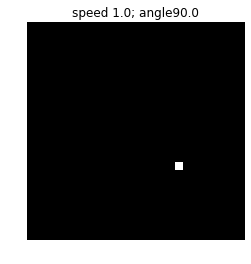

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [21]:
play_raw_data(ds, test_quadrant_index, lim=40, canvas_size=28)

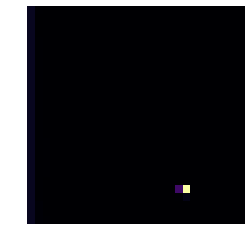

In [22]:
play_predictions_openloop(ds, test_quadrant_index, net, lim=100, canvas_size=28)


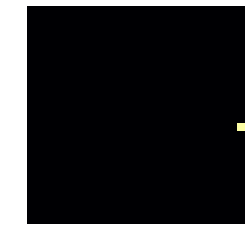

In [25]:
play_predictions_closedloop3D(ds, test_quadrant_index[0], net, lim=30, canvas_size=28)